# Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()

# Load Data

In [5]:
pd_graph = pd.read_csv("data_tr.csv")
pd_graph

,u,v,t,h
0,8538,53245,82,9
1,32991,41149,39,4
2,30104,35030,25,4
3,26292,48613,37,1
4,31603,32991,59,9
...,...,...,...,...
48604,12751,71902,98,4
48605,6430,76576,89,6
48606,1021,6872,83,5
48607,28392,55610,75,8


# EDA

In [6]:
pd_graph.shape

(48609, 4)

In [7]:
pd_graph.u.value_counts()

32215    1099
4098      167
13815     128
22842     126
13190     107
         ... 
25800       1
14134       1
60229       1
24433       1
67920       1
Name: u, Length: 9300, dtype: int64

/tmp/ipykernel_5117/2752268001.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(src_degree[src_degree < 50])


<AxesSubplot: ylabel='Density'>

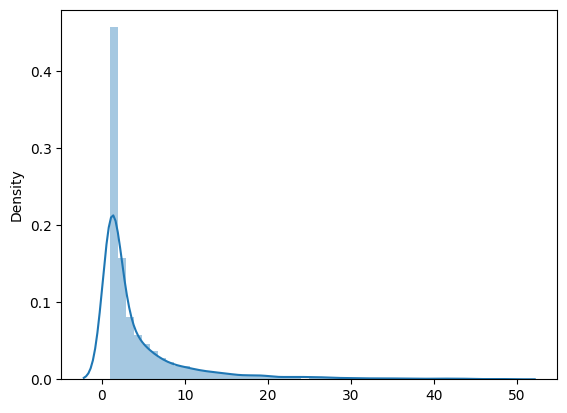

In [8]:
src_degree = np.array(list(pd_graph.u.value_counts()))
sns.distplot(src_degree[src_degree < 50])

In [9]:
pd_graph.v.value_counts()

32215    712
83552    140
80636    110
81115    106
76576     97
        ... 
29093      1
62930      1
6098       1
52621      1
6872       1
Name: v, Length: 9437, dtype: int64

/tmp/ipykernel_5117/794328783.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dst_degree[dst_degree < 50])


<AxesSubplot: ylabel='Density'>

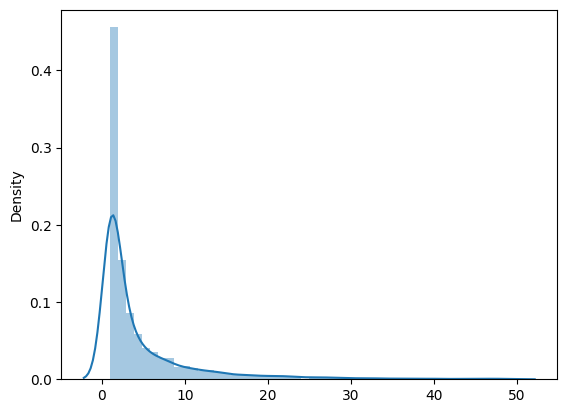

In [10]:
dst_degree = np.array(list(pd_graph.v.value_counts()))
sns.distplot(dst_degree[dst_degree < 50])

In [11]:
pd_graph.t.value_counts()

82    491
17    491
88    491
11    491
26    491
     ... 
18    491
81    491
79    491
19    491
33    491
Name: t, Length: 99, dtype: int64

In [12]:
pd_graph.h.value_counts()

2    4924
1    4923
3    4923
4    4922
0    4921
6    4917
5    4914
7    4895
8    4814
9    4456
Name: h, dtype: int64

/tmp/ipykernel_5117/1175231524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=pd_graph.h, kde=False)


<AxesSubplot: >

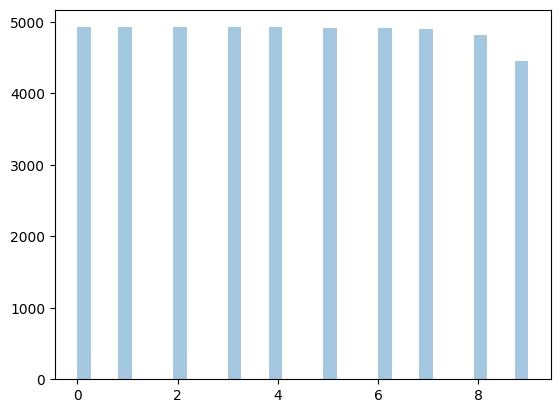

In [13]:
sns.distplot(x=pd_graph.h, kde=False)

<AxesSubplot: xlabel='h', ylabel='t'>

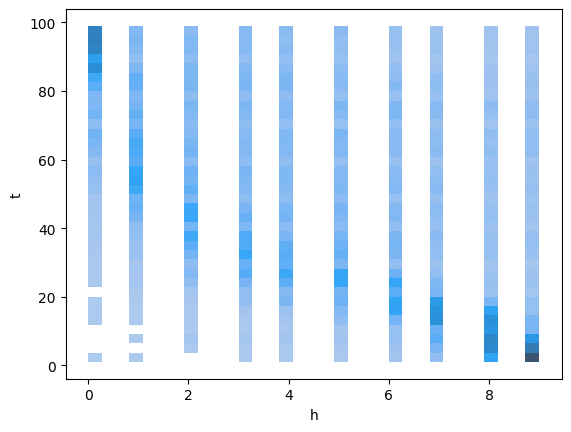

In [14]:
sns.histplot(pd_graph, x="h", y="t")

# Node2Vec Baseline

In [15]:
from sklearn.preprocessing import LabelEncoder

u_le = LabelEncoder()
v_le = LabelEncoder()

pd_graph.u = u_le.fit_transform(pd_graph.u)
pd_graph.v = v_le.fit_transform(pd_graph.v)
pd_graph

,u,v,t,h
0,1340,4774,82,9
1,4748,3260,39,4
2,4377,2559,25,4
3,3887,4163,37,1
4,4579,2348,59,9
...,...,...,...,...
48604,1971,7432,98,4
48605,994,8143,89,6
48606,150,184,83,5
48607,4161,5081,75,8


In [22]:
adj_list = [[] for i in range(pd_graph.u.append(pd_graph.v).unique().shape[0])]
adj_list

/tmp/ipykernel_5117/18675902.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adj_list = [[] for i in range(pd_graph.u.append(pd_graph.v).unique().shape[0])]


[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [23]:
src_dst = list(map(list, list(pd_graph[["u", "v"]].to_numpy())))
src_dst

[[1340, 4774],
 [4748, 3260],
 [4377, 2559],
 [3887, 4163],
 [4579, 2348],
 [2043, 1687],
 [2153, 1737],
 [88, 330],
 [5970, 8333],
 [763, 8909],
 [3737, 7784],
 [5767, 7890],
 [1874, 3371],
 [983, 6504],
 [4208, 7600],
 [4932, 4326],
 [3073, 2014],
 [43, 1542],
 [48, 5327],
 [3974, 4063],
 [5065, 3150],
 [4723, 3892],
 [4616, 6959],
 [2563, 6674],
 [6306, 4042],
 [4410, 2721],
 [771, 2278],
 [1899, 1019],
 [4451, 2387],
 [2084, 1027],
 [2968, 4128],
 [7618, 6388],
 [1654, 1575],
 [3480, 4592],
 [4867, 3773],
 [8399, 9240],
 [1833, 3132],
 [3024, 3679],
 [1278, 5599],
 [1566, 1294],
 [3977, 5267],
 [514, 2336],
 [4144, 4702],
 [4128, 6404],
 [5760, 5127],
 [862, 5466],
 [4389, 2118],
 [8598, 8076],
 [4141, 6225],
 [5261, 9310],
 [8936, 8148],
 [5497, 4268],
 [4281, 7497],
 [22, 7968],
 [3842, 8937],
 [6731, 6353],
 [7803, 6922],
 [489, 1755],
 [4643, 8703],
 [6888, 8411],
 [2751, 5496],
 [2084, 8475],
 [2350, 5520],
 [8137, 6596],
 [2927, 9141],
 [1258, 651],
 [1598, 1997],
 [580, 1105

In [24]:
for u, v in src_dst:
    adj_list[u].append(v)
    adj_list[v].append(u)

adj_list

[[42, 6239],
 [1850, 163],
 [4, 6361],
 [5709, 760, 4388, 9198, 1733, 6816, 4004, 5552, 105, 1631, 208, 1563, 1514],
 [2, 6765, 893, 85, 4157, 167],
 [1812, 170],
 [155, 8236],
 [218, 2275],
 [3330, 155, 169],
 [6259,
  4670,
  5837,
  7089,
  1026,
  138,
  6749,
  7095,
  3513,
  4477,
  545,
  62,
  6551,
  2363,
  4114,
  4190,
  6304,
  7392,
  7384,
  8878,
  8640,
  709,
  789,
  1603,
  1587,
  8042,
  1982,
  681,
  7393,
  4873,
  5045,
  5138,
  2278,
  1935,
  890,
  801,
  4606,
  199,
  105,
  7035,
  3379,
  3077,
  9190,
  6459,
  338,
  1208,
  820,
  5507,
  4523,
  6323,
  9148,
  275,
  1809,
  8196,
  6549,
  1351,
  1510,
  5025,
  7084],
 [4242, 185, 2734, 219, 43, 8988, 3463, 4891, 7572, 7809, 855, 6442],
 [198, 218, 8743],
 [188, 143],
 [6361, 24, 1997],
 [4321, 268, 621],
 [3308,
  5063,
  4573,
  5166,
  3598,
  106,
  325,
  3138,
  2278,
  233,
  5812,
  5355,
  758,
  9394,
  5228,
  6323,
  2407,
  1351,
  6630],
 [268, 1294],
 [43, 8694],
 [8521, 113],
 

In [ ]:
def random_walk(adj_list, n_nodes):
    walks = []
    
    for i in range(n_nodes);
        walkwalk(i)

In [25]:
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

import os
import networkx as nx
import numpy as np
import pandas as pd

from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph
from stellargraph import datasets
from IPython.display import display, HTML

ModuleNotFoundError: No module named 'stellargraph'

In [26]:
!pip install stellargraph

ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.6.0, <3.8.0; 0.11.0 Requires-Python >=3.6.0, <3.8.0; 0.11.1 Requires-Python >=3.6.0, <3.8.0; 0.4.0 Requires-Python >=3.6,<3.7; 0.4.0b0 Requires-Python >=3.6,<3.7; 0.4.1 Requires-Python >=3.5.0, <3.7.0; 0.5.0 Requires-Python >=3.5.0, <3.7.0; 0.6.0 Requires-Python >=3.5.0, <3.7.0; 0.6.1 Requires-Python >=3.5.0, <3.7.0; 0.7.0 Requires-Python >=3.5.0, <3.8.0; 0.7.1 Requires-Python >=3.5.0, <3.8.0; 0.7.2 Requires-Python >=3.5.0, <3.8.0; 0.7.3 Requires-Python >=3.5.0, <3.8.0; 0.8.0 Requires-Python >=3.5.0, <3.8.0; 0.8.1 Requires-Python >=3.5.0, <3.8.0; 0.8.2 Requires-Python >=3.5.0, <3.8.0; 0.8.3 Requires-Python >=3.5.0, <3.8.0; 0.8.4 Requires-Python >=3.5.0, <3.8.0; 0.9.0 Requires-Python >=3.6.0, <3.8.0; 1.0.0 Requires-Python >=3.6.0, <3.8.0; 1.0.0rc1 Requires-Python >=3.6.0, <3.8.0; 1.1.0 Requires-Python >=3.6.0, <3.9.0; 1.2.0 Requires-Python >=3.6.0, <3.9.0; 1.2.1 Requires-Python >=3.